In [33]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [34]:
# Load your dataset
# Assuming your dataset has columns 'datetime', 'total_visitor', 'total_accomodation'
# Adjust the file path accordingly

data = pd.read_csv('KepRiau 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output



TEST SIZE 80: 20

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [36]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [37]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
3/3 - 2s - loss: 0.3128 - val_loss: 0.0318 - 2s/epoch - 809ms/step
Epoch 2/50
3/3 - 0s - loss: 0.2669 - val_loss: 0.0256 - 50ms/epoch - 17ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2272 - val_loss: 0.0293 - 68ms/epoch - 23ms/step
Epoch 4/50
3/3 - 0s - loss: 0.1914 - val_loss: 0.0422 - 70ms/epoch - 23ms/step
Epoch 5/50
3/3 - 0s - loss: 0.1632 - val_loss: 0.0635 - 67ms/epoch - 22ms/step
Epoch 6/50
3/3 - 0s - loss: 0.1371 - val_loss: 0.0915 - 57ms/epoch - 19ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1173 - val_loss: 0.1248 - 47ms/epoch - 16ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1027 - val_loss: 0.1621 - 46ms/epoch - 15ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0923 - val_loss: 0.2013 - 42ms/epoch - 14ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0839 - val_loss: 0.2391 - 44ms/epoch - 15ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0789 - val_loss: 0.2743 - 43ms/epoch - 14ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0753 - val_loss: 0.3039 - 45ms/epoch - 15ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0745 - val_loss: 0.

In [38]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

1/1 [==============================] - 0s 329ms/step
Mean Squared Error (MSE): 6621350.267664029
Mean Absolute Error (MAE): 2424.8630760234523
Mean Absolute Percentage Error (MAPE): 23.46%


In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 40ms/step


TEST SIZE 70:30

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [42]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [43]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100


3/3 - 2s - loss: 0.1796 - val_loss: 0.1697 - 2s/epoch - 595ms/step
Epoch 2/100
3/3 - 0s - loss: 0.1455 - val_loss: 0.2261 - 65ms/epoch - 22ms/step
Epoch 3/100
3/3 - 0s - loss: 0.1164 - val_loss: 0.2910 - 75ms/epoch - 25ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0914 - val_loss: 0.3627 - 63ms/epoch - 21ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0706 - val_loss: 0.4394 - 53ms/epoch - 18ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0543 - val_loss: 0.5186 - 49ms/epoch - 16ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0419 - val_loss: 0.5978 - 53ms/epoch - 18ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0340 - val_loss: 0.6755 - 53ms/epoch - 18ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0284 - val_loss: 0.7441 - 51ms/epoch - 17ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0258 - val_loss: 0.8007 - 53ms/epoch - 18ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0244 - val_loss: 0.8414 - 47ms/epoch - 16ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0242 - val_loss: 0.8712 - 53ms/epoch - 18ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0243 - val_loss: 0

In [44]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 17596942.776945796
Mean Absolute Error (MAE): 4125.457384347422
Mean Absolute Percentage Error (MAPE): 40.02%


In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_30 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_30 = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 77ms/step


TEST SIZE 60:40

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [48]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [49]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
2/2 - 1s - loss: 0.3764 - val_loss: 0.1685 - 1s/epoch - 650ms/step
Epoch 2/100
2/2 - 0s - loss: 0.3424 - val_loss: 0.1467 - 43ms/epoch - 21ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3101 - val_loss: 0.1287 - 41ms/epoch - 20ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2800 - val_loss: 0.1146 - 40ms/epoch - 20ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2510 - val_loss: 0.1042 - 38ms/epoch - 19ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2236 - val_loss: 0.0976 - 43ms/epoch - 21ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1986 - val_loss: 0.0945 - 45ms/epoch - 23ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1752 - val_loss: 0.0950 - 41ms/epoch - 20ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1536 - val_loss: 0.0988 - 40ms/epoch - 20ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1335 - val_loss: 0.1058 - 41ms/epoch - 20ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1152 - val_loss: 0.1158 - 40ms/epoch - 20ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0993 - val_loss: 0.1286 - 39ms/epoch - 19ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0844 -

In [50]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 0s 5ms/step
Mean Squared Error (MSE): 16044656.53938027
Mean Absolute Error (MAE): 3578.238311812333
Mean Absolute Percentage Error (MAPE): 34.30%


In [51]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_40 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_40 = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 37ms/step


VISUALIZATION

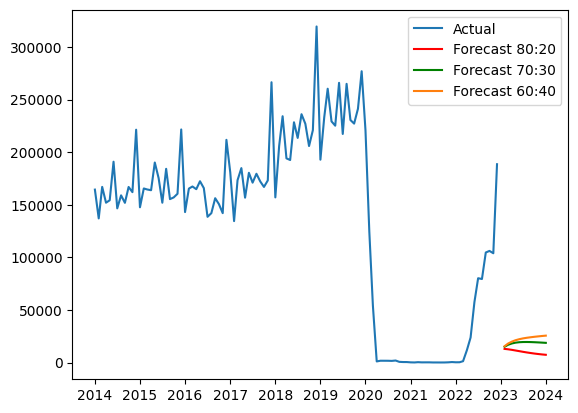

In [53]:
# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast 80:20', color='red')
plt.plot(future_dates_30, y_future_pred_inv_30, label='Forecast 70:30', color='green')
plt.plot(future_dates_40, y_future_pred_inv_40, label='Forecast 60:40')
plt.legend()
plt.show()